In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#save the dataset files in a new folder in your gdrive, I've modified StudentAssessments
!ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/Datasets

/content/drive/.shortcut-targets-by-id/1xLFDpoa_U9oW5qvFEvYTtCDqdMWucL1p/Datasets


In [ ]:
#importing CSVs 
studentInfo = pd.read_csv('studentInfo - studentInfo (1).csv', error_bad_lines = False, low_memory=False)
studentRegistration = pd.read_csv('studentRegistration.csv', error_bad_lines = False, low_memory=False)
studentVle = pd.read_csv('studentVle.csv', error_bad_lines = False, low_memory=False)
assessments = pd.read_csv('assessments.csv', error_bad_lines = False, low_memory=False)
courses = pd.read_csv('courses.csv', error_bad_lines = False, low_memory=False)
vle = pd.read_csv('vle.csv', error_bad_lines = False, low_memory=False)
lateSubmission = pd.read_csv('LateSubmission.csv', error_bad_lines = False, low_memory=False)
studentAssessment = pd.read_csv('studentAssessmentwithquiz.csv', error_bad_lines = False, low_memory=False)

In [ ]:
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_absences_per_year,attendance,frequency_interaction
0,AAA,2014J,6516,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,10,65,39
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,15,62,15
2,AAA,2014J,24734,F,South Region,Lower Than A Level,60-70%,0-35,0,60,N,Pass,10,88,14
3,AAA,2014J,26192,F,East Anglian Region,A Level or Equivalent,60-70%,35-55,0,60,N,Distinction,7,112,31
4,AAA,2014J,28061,M,Yorkshire Region,Lower Than A Level,40-50%,35-55,0,60,N,Pass,9,92,36


In [ ]:
studentRegistration['date_unregistration'].replace('NaN', '0', inplace=True)

In [ ]:
#normalizing (x-x.mean) / x.std scaling down (-1,1)
def normalize(input):
    return abs((input - np.mean(input))/np.std(input))

In [ ]:
#finding out engagement index
student_info = studentInfo.drop(['age_band', 'highest_education', 'studied_credits'], axis = 1)
k1 = k3 = 2
k2 = 1
k4 = 3
k5 = 2
last_submission = np.random.normal(0, 10) #remove replace with (last submission - curr_date)
engagement_index = k1*normalize(studentInfo['frequency_interaction']) + k2*normalize(last_submission) + k3*normalize(studentAssessment['score'])
+k4*(normalize(studentRegistration['date_registration'] - studentRegistration['date_unregistration'])) + k5*normalize(student_info['attendance'])
studentInfo = studentInfo.assign(Engagement_index= engagement_index) 
#if negative change to 0 number of school days student was enrolled in the course

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
studentInfo.drop(['highest_education', 'age_band'], axis =1)
# studentInfo.

,code_module,code_presentation,id_student,gender,region,imd_band,num_of_prev_attempts,studied_credits,disability,final_result,avg_absences_per_year,attendance,frequency_interaction,Engagement_index
0,AAA,2014J,6516,M,Scotland,80-90%,0,60,N,Pass,10,65,39,NaN
1,AAA,2013J,11391,M,East Anglian Region,90-100%,0,240,N,Pass,15,62,15,NaN
2,AAA,2014J,24734,F,South Region,60-70%,0,60,N,Pass,10,88,14,NaN
3,AAA,2014J,26192,F,East Anglian Region,60-70%,0,60,N,Distinction,7,112,31,NaN
4,AAA,2014J,28061,M,Yorkshire Region,40-50%,0,60,N,Pass,9,92,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2679821,F,South East Region,90-100%,0,30,N,Withdrawn,15,73,17,NaN
32589,GGG,2014B,2682002,F,Yorkshire Region,80-90%,0,30,N,Distinction,7,80,25,NaN
32590,GGG,2014J,2684003,F,Yorkshire Region,50-60%,0,30,N,Distinction,11,51,27,NaN
32591,GGG,2014B,2689480,F,North Region,40-50%,0,30,N,Pass,11,62,37,NaN


In [ ]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
studentVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [ ]:
studentVle.drop(['date'], axis =1)

,code_module,code_presentation,id_student,id_site,sum_click
0,AAA,2013J,28400,546652,4
1,AAA,2013J,28400,546652,1
2,AAA,2013J,28400,546652,1
3,AAA,2013J,28400,546614,11
4,AAA,2013J,28400,546714,1
...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,3
10655276,GGG,2014J,675578,896943,1
10655277,GGG,2014J,654064,896943,3
10655278,GGG,2014J,654064,896939,1


In [ ]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
courses.head()

,code_module,code_presentation,module_presentation_length,students_per_teacher
0,AAA,2013J,268,17
1,AAA,2014J,269,50
2,BBB,2013J,268,39
3,BBB,2014J,262,36
4,BBB,2013B,240,37


In [ ]:
lateSubmission.shape

(173912, 6)

In [ ]:
courses.shape

(22, 4)

In [ ]:
vle.shape

(6364, 6)

In [ ]:
studentAssessment.shape


(173912, 6)

In [ ]:
# Majority of students are giving their 1st attempt

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


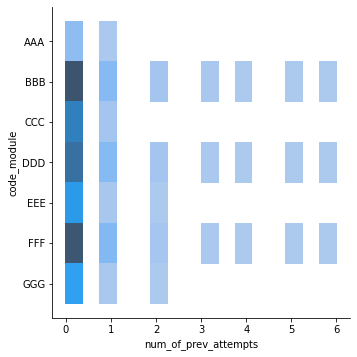

In [ ]:
sns.pairplot(student_info, x_vars=["num_of_prev_attempts"], y_vars=["code_module"], dropna=True, size=5,kind="hist")

In [ ]:
# Majority of students fall under 0-35 age band

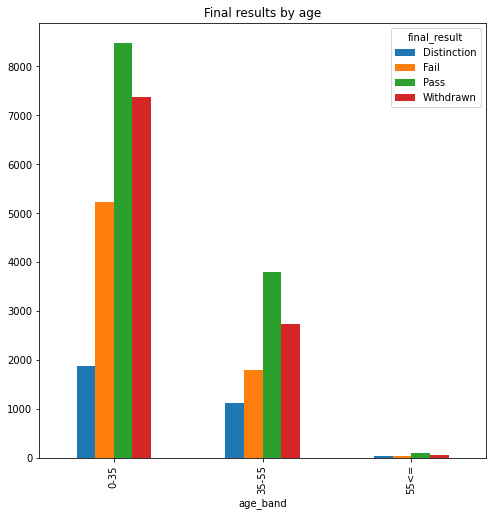

In [ ]:
studentInfo.groupby(['age_band','final_result']).size().unstack().plot(kind='bar', title='Final results by age',figsize=(8,8))
plt.show()

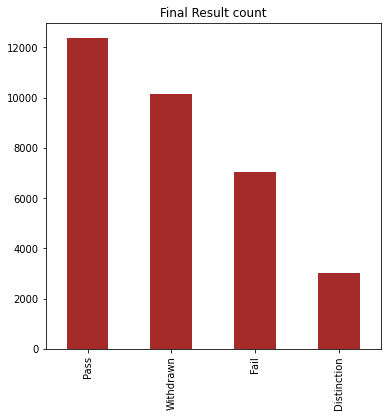

In [ ]:
student_info['final_result'].value_counts().plot(kind='bar', title='Final Result count',color='brown', figsize=(6,6))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Activity types')

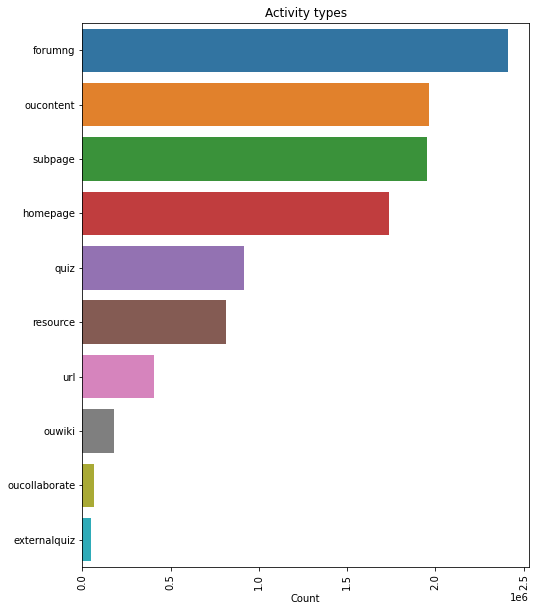

In [ ]:
student_vle_all = studentVle.merge(vle, on = 'id_site', how = 'left')
plt.figure(figsize=(8,10))
plt.xticks(rotation = 90)
a=student_vle_all['activity_type'].value_counts()[:10]
sns.barplot(a,a.index)
plt.xlabel('Count')
plt.title("Activity types")

In [ ]:
#number of quizes displayed according to score

In [ ]:
studentAssessment['Quiz'].value_counts()

4    86049
3    53569
5    18813
2    12024
1     3457
Name: Quiz, dtype: int64

In [ ]:
# id_meandate = assignment_date.groupby('id_assessment')[['date_submitted']].mean()

In [ ]:
# id_meandate

In [ ]:
# merged = pd.merge(id_meandate, assignment_date, on = "id_assessment")

In [ ]:
#comparision with mean date and date submitted for individual student ID will give us status of submission
# merged

In [ ]:
withlatesub = pd.read_csv('/content/drive/MyDrive/Datasets/LateSubmission.csv', error_bad_lines = False, low_memory=False)


In [ ]:
#After manipulation added column to mention whether submission was made after mean date of submission
withlatesub

,Unnamed: 0,id_assessment,Mean_date,id_student,date_submitted,late_submission
0,0,1752,19.356546,11391,18,N
1,1,1752,19.356546,28400,22,Y
2,2,1752,19.356546,31604,17,N
3,3,1752,19.356546,32885,26,Y
4,4,1752,19.356546,38053,19,N
...,...,...,...,...,...,...
173907,173907,37443,221.572674,527538,227,Y
173908,173908,37443,221.572674,534672,229,Y
173909,173909,37443,221.572674,546286,215,N
173910,173910,37443,221.572674,546724,230,Y


In [ ]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [ ]:
site_count = studentVle.groupby(['code_module', 'code_presentation','id_student']).agg({'id_student':['size']})
site_count.reset_index(level=[0,1,2], inplace=True)
site_count.columns = ['code_module', 'code_presentation','id_student','site_count']
site_count

,code_module,code_presentation,id_student,site_count
0,AAA,2013J,11391,196
1,AAA,2013J,28400,430
2,AAA,2013J,30268,76
3,AAA,2013J,31604,663
4,AAA,2013J,32885,352
...,...,...,...,...
29223,GGG,2014J,2640965,19
29224,GGG,2014J,2645731,237
29225,GGG,2014J,2648187,108
29226,GGG,2014J,2679821,61


In [ ]:
vle_new = pd.merge(studentVle, site_count, how = 'outer', on=['code_module','code_presentation','id_student'] )
vle_new

,code_module,code_presentation,id_student,id_site,date,sum_click,site_count
0,AAA,2013J,28400,546652,-10,4,430
1,AAA,2013J,28400,546652,-10,1,430
2,AAA,2013J,28400,546652,-10,1,430
3,AAA,2013J,28400,546614,-10,11,430
4,AAA,2013J,28400,546714,-10,1,430
...,...,...,...,...,...,...,...
10655275,GGG,2014J,624767,897068,217,1,24
10655276,GGG,2014J,624767,896959,217,1,24
10655277,GGG,2014J,624767,896974,217,1,24
10655278,GGG,2014J,624767,896943,225,1,24


In [ ]:
studentVle_new = vle_new.groupby(['id_student', 'code_module', 'code_presentation', 'site_count']).agg({'sum_click':['mean','sum']})
studentVle_new.reset_index(level=[0,1,2,3], inplace=True)
studentVle_new.columns = ['id_student', 'code_module', 'code_presentation','site_count', 'mean_clicks', 'sum_clicks']
vle_interactions = pd.merge(studentInfo,studentVle_new, how='outer', on=['id_student', 'code_module', 'code_presentation'])
vle_interactions = vle_interactions[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','site_count','final_result']]
vle_interactions.reset_index(level=[0], inplace=True)
vle_interactions = vle_interactions.drop(['highest_education'], axis = 1)

<Figure size 1440x864 with 0 Axes>

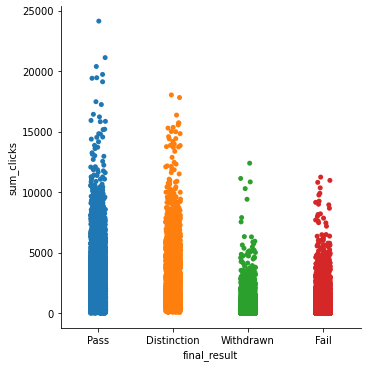

In [ ]:
plt.figure(figsize=(20,12))
sns.catplot(x='final_result', y = 'sum_clicks', data = vle_interactions)
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

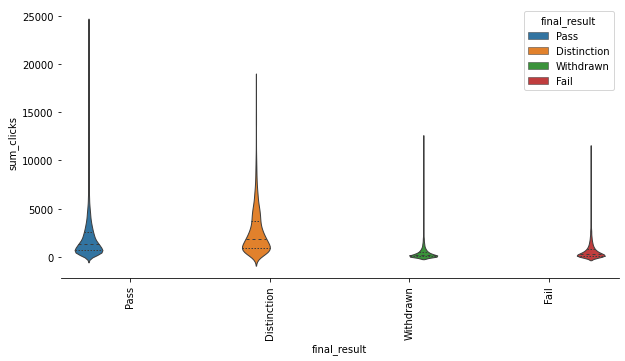

In [ ]:
plt.subplots(figsize=(10, 5))
sns.violinplot(data=vle_interactions, x='final_result', y = 'sum_clicks', hue='final_result',
                inner="quart", linewidth=1,
               )
sns.despine(left=True)
plt.xticks(rotation = 90)

In [ ]:
final = pd.merge(studentVle, student_info,how='outer', on=['id_student', 'code_module', 'code_presentation'])
final = final.fillna(0)
final = final.assign(Engagement_index= engagement_index) 

final

,code_module,code_presentation,id_student,id_site,date,sum_click,gender,region,imd_band,num_of_prev_attempts,disability,final_result,avg_absences_per_year,attendance,frequency_interaction,Engagement_index
0,AAA,2013J,28400,546652.0,-10.0,4.0,F,Scotland,20-30%,0,N,Pass,7,70,13,NaN
1,AAA,2013J,28400,546652.0,-10.0,1.0,F,Scotland,20-30%,0,N,Pass,7,70,13,NaN
2,AAA,2013J,28400,546652.0,-10.0,1.0,F,Scotland,20-30%,0,N,Pass,7,70,13,NaN
3,AAA,2013J,28400,546614.0,-10.0,11.0,F,Scotland,20-30%,0,N,Pass,7,70,13,NaN
4,AAA,2013J,28400,546714.0,-10.0,1.0,F,Scotland,20-30%,0,N,Pass,7,70,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10658640,GGG,2014J,2239862,0.0,0.0,0.0,M,North Western Region,50-60%,0,N,Withdrawn,44,104,24,NaN
10658641,GGG,2013J,2440133,0.0,0.0,0.0,F,London Region,60-70%,0,N,Withdrawn,13,91,22,NaN
10658642,GGG,2013J,2464917,0.0,0.0,0.0,M,East Anglian Region,20-30%,0,N,Fail,14,82,13,NaN
10658643,GGG,2013J,2540288,0.0,0.0,0.0,F,South Region,50-60%,0,N,Fail,13,80,23,NaN


In [ ]:
final.info();

In [ ]:

plt.matshow(final.corr());

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [ ]:
final.code_module = labelEncoder.fit_transform(final.code_module)
final.code_presentation = labelEncoder.fit_transform(final.code_presentation)
final.gender = labelEncoder.fit_transform(final.gender)
final.region = labelEncoder.fit_transform(final.region)
final.disability = labelEncoder.fit_transform(final.disability)
final.final_result = labelEncoder.fit_transform(final.final_result)

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(final.corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [ ]:
final1 = final.drop(['id_student', 'code_module', 'code_presentation','gender','region'], axis=1)

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(final1.corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [ ]:
x = final1.drop(['final_result','num_of_prev_attempts','disability', 'imd_band'], axis=1).values
y = final1['final_result']

In [ ]:
final1

In [ ]:
x[10]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x[:10000, :], y[:10000], test_size = 0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred)
print("accuracy of train:", acc_score*100)

In [ ]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of test:", acc_score*100)

In [ ]:
rfc_ = rfc(n_estimators=100,criterion='gini', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
rfc_.fit(x_train, y_train)
print("accuracy of train:", acc_score*100)

In [ ]:
y_pred = rfc_.predict(x_test)
acc_score = metrics.accuracy_score(y_test, y_pred)
print("accuracy of test:", acc_score*100)

In [ ]:
print(y_pred[6]) # 3 lowest risk 2 lower risk 1 high risk


In [ ]:
print(y_train[6])